In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, manifold

%matplotlib inline


data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)


pixel_values, targets = data
targets = targets.astype(int)
print(pixel_values.shape, targets.shape)

# single_img = pixel_values[1, :].reshape(28, 28)
# plt.imshow(single_img)

tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

tsne_df = pd.DataFrame(np.column_stack(
    (transformed_data, targets[:3000])),
    columns=['x', 'y', 'targets']
)

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)
tsne_df.head()


(70000, 784) (70000,)


,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


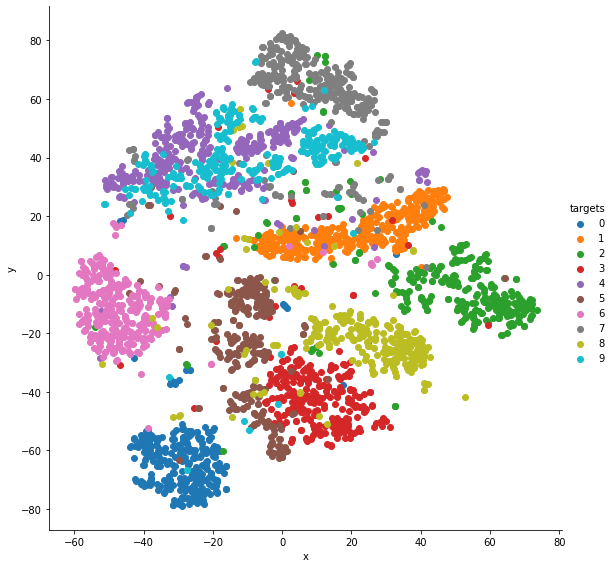

In [4]:
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()
plt.show()

In [6]:
#ch 3

from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

%matplotlib inline

import pandas as pd 
import numpy as np 


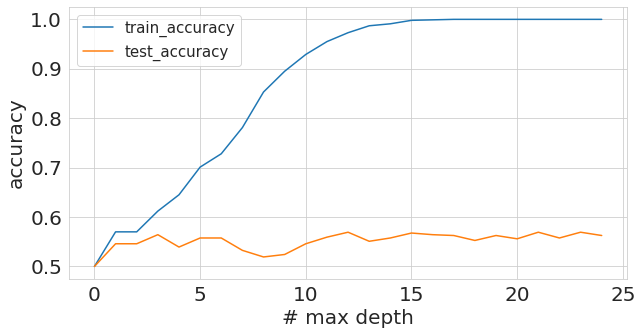

In [22]:
train_accuracies =[0.5]
test_accuracies =[0.5]

df= pd.read_csv('winequality-red.csv')
df = df.sample(frac=1).reset_index(drop=True)
df_train=df.head(1000)
df_test = df.tail(599)

cols =[col for col in df.columns if col !='quality']

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(df_train[cols],df_train['quality'])

    train_pred = clf.predict(df_train[cols])
    test_pred = clf.predict(df_test[cols])

    train_accuracies.append(metrics.accuracy_score(df_train.quality,train_pred))
    test_accuracies.append(metrics.accuracy_score(df_test.quality,test_pred))

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies , label='train_accuracy')
plt.plot(test_accuracies , label='test_accuracy')
plt.legend(loc='upper left', prop={'size':15})
plt.xlabel('# max depth',size=20)
plt.ylabel('accuracy' ,size=20)


plt.show()






In [7]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold as sfk 
%matplotlib inline

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


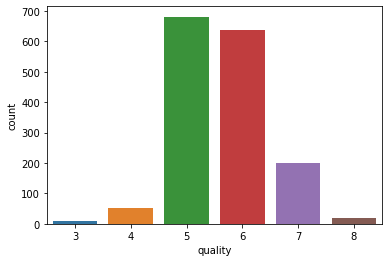

In [8]:
sns.countplot(x = 'quality' ,data=df )
plt.show()

In [9]:
df['kfold'] = -1
cols = [col for col in df.columns if col != 'quality']
for 

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'kfold']